Visualization Library and Data Importation: You’ll start by installing and importing your libraries.

Data Cleaning: Next, you’ll import the “real_estate.csv” file and conduct any necessary data cleaning.

Exploring Relationships: Finally, you’ll find code for conducting an exploratory analysis of your data.

 This section will follow the same structure as the rest of this Exercise:

Correlations
Scatterplots
Pair plots
Categorical plots

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [ ]:

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#question 1 import cleaned df
df = pd.read_csv('/content/drive/My Drive/hapdf.csv')

In [ ]:
df.shape

(781, 11)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Year'],
      dtype='object')

In [ ]:
#question 2 drop unnecessary columns
df.drop(columns = {'Unnamed: 0'}, inplace = True)


In [ ]:
#question 3 create a heatmap
#create a subset
# Create a subset excluding the country, ha columns

sub = df[['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']]

In [ ]:
sub

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,153,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510
1,95,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272
2,68,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822
3,137,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344
4,30,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451
...,...,...,...,...,...,...,...,...
776,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700
777,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600
778,154,3.203,0.35000,0.51700,0.36100,NaN,0.02500,0.15800
779,155,3.083,0.02600,NaN,0.10500,0.22500,0.03500,0.23500


In [ ]:
sub.corr

<bound method DataFrame.corr of      Happiness Rank  Happiness Score  Economy (GDP per Capita)   Family  \
0               153            3.575                   0.31982  0.30285   
1                95            4.959                   0.87867  0.80434   
2                68            5.605                   0.93929  1.07772   
3               137            4.033                   0.75778  0.86040   
4                30            6.574                   1.05351  1.24823   
..              ...              ...                       ...      ...   
776             152            3.334                   0.35900  0.71100   
777             153            3.231                   0.47600  0.88500   
778             154            3.203                   0.35000  0.51700   
779             155            3.083                   0.02600      NaN   
780             156            2.853                   0.30600  0.57500   

     Health (Life Expectancy)  Freedom  Trust (Government Corruptio

Text(0.5, 1.0, 'Correlation Matrix')

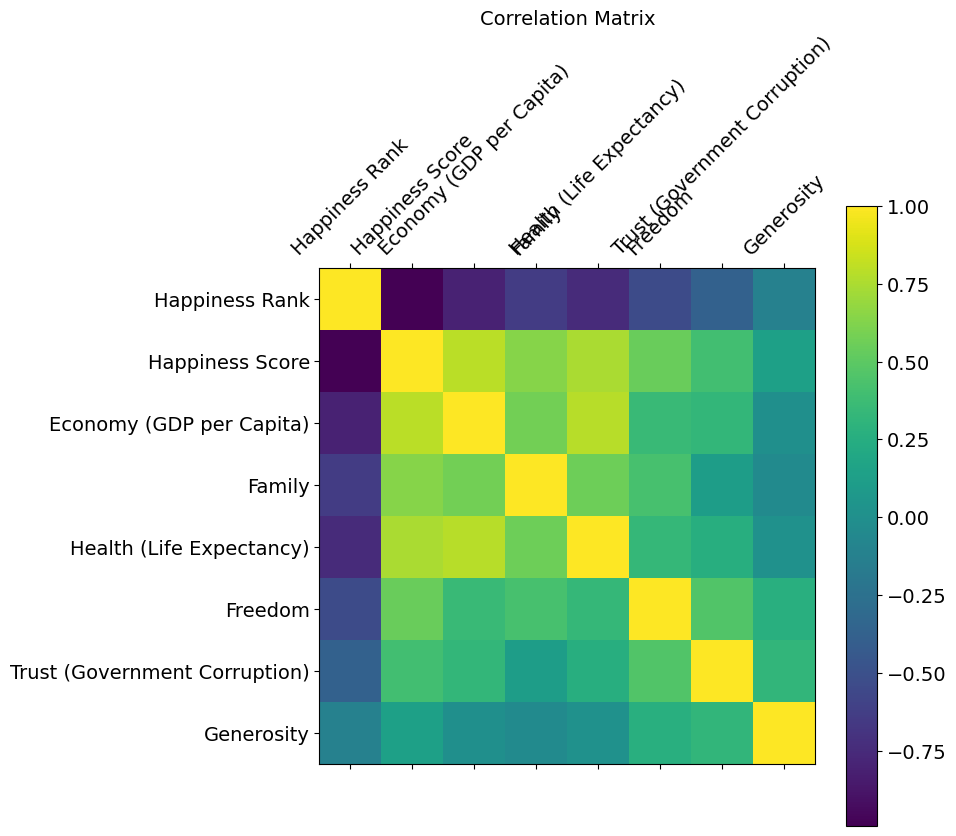

In [ ]:
f = plt.figure(figsize=(8, 8)) # figure size
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

Observations: Something odd I notice is that happiness rank and score tend to have a negative relationship. How does this make any sense?
Hypothesis: It has occured to me that the lower the rank is the HAPPIER the consituents. I.e. 1 = most happy. So an inverse relatinoship is approriate for happiness score and rank, all happiness factors and rank.

Observation: Wealth and health are the most strongly correlated with, somewhere around 0.75 correlation which is very strong. They also seem to be correlated with eachother in happiness scores i.e. if someone is high in happiness bc of wealth then they are high in happiness because of wealth.

Observation: The least correlated to happiness is feelings of generosity, which is correlated around 0.00-0.25. This is unfortunate -- being generous does not correlate to happiness or has a very weak correlation.



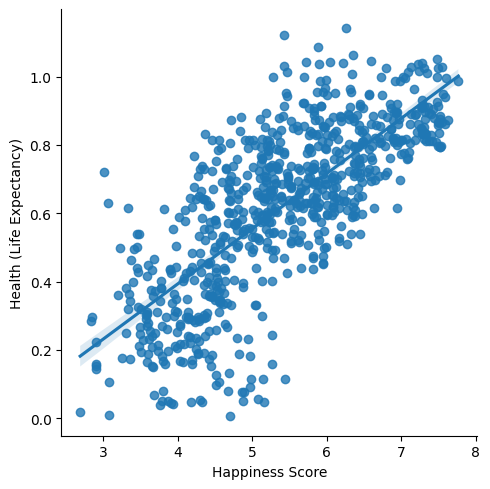

In [ ]:
#question 4 create a scatterplot

sns.lmplot(x = 'Happiness Score', y = 'Health (Life Expectancy)', data = sub)

In [ ]:
#I am going to use the happiness score and remove the rank for the pair plots
sub2 = df[[ 'Happiness Score', 'Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']]

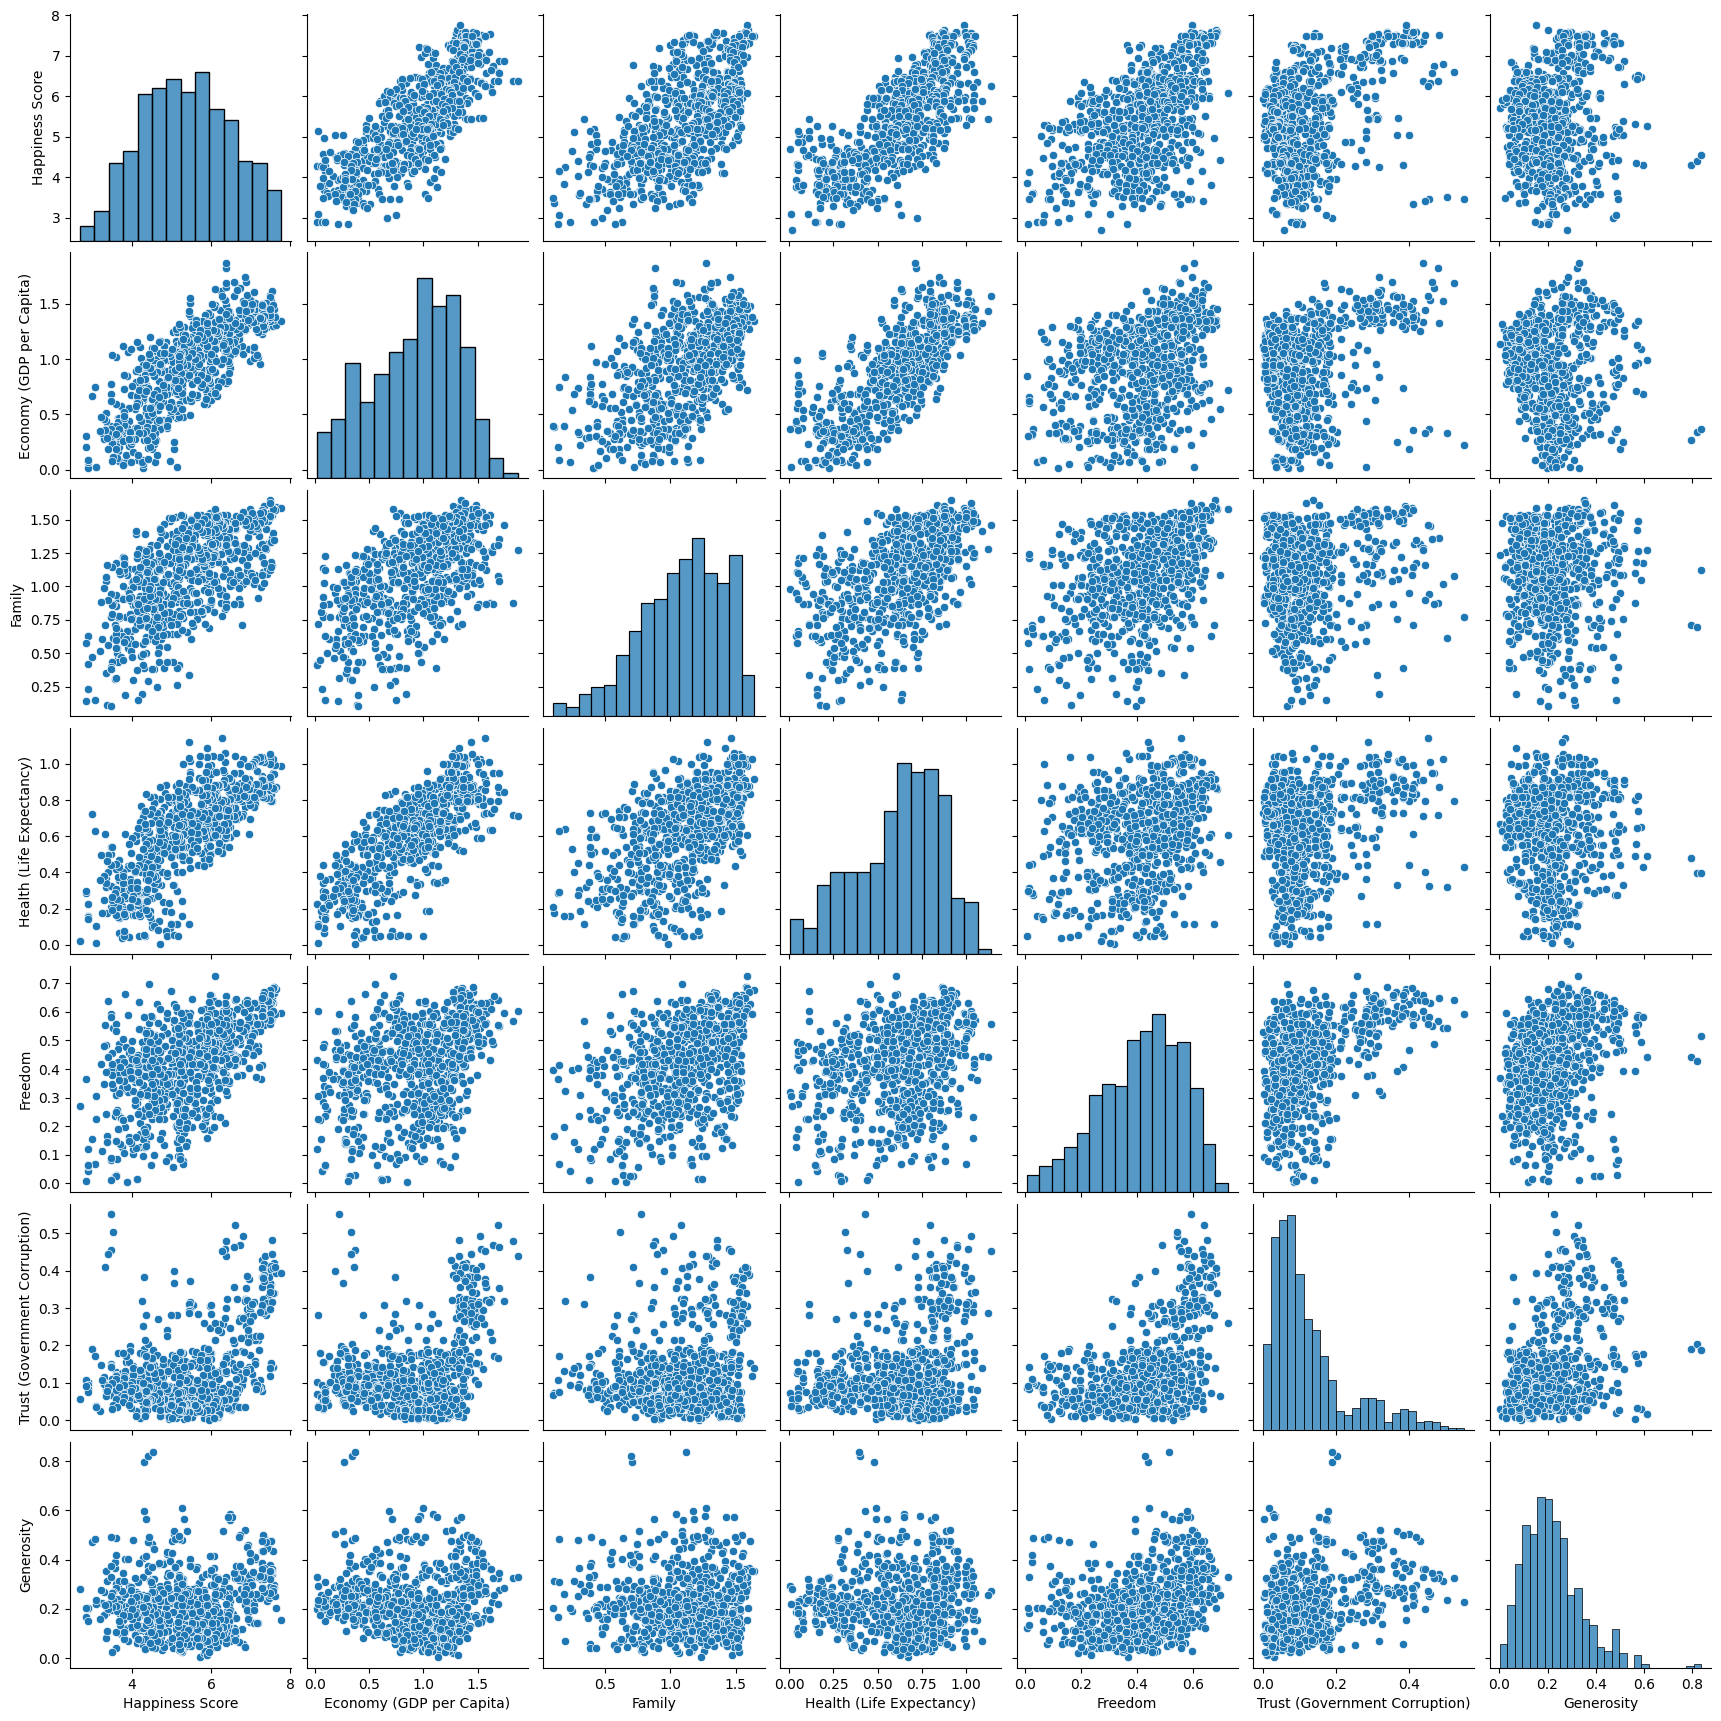

In [ ]:
#step 5 create pairplot
g = sns.pairplot(sub2)

It seems health, family and economy are an easy positive correlation. Trust of

---

the government seems odd where it only correlates in the upper extreme of happiness. and generosity has little to no effect.

<Axes: xlabel='Happiness Score', ylabel='Count'>

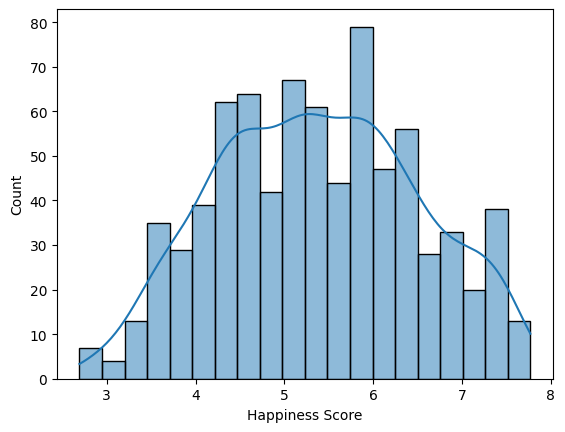

In [ ]:
sns.histplot(df['Happiness Score'], bins = 20, kde = True)

In [ ]:
df.loc[df['Happiness Score'] < 4, 'Happiness Category'] = 'Low Level of Happiness'

In [ ]:
df.loc[(df['Happiness Score'] >= 4) & (df['Happiness Score'] < 6), 'Happiness Category'] = 'Mid Level of Happiness'

In [ ]:
df.loc[df['Happiness Score'] >= 6, 'Happiness Category'] = 'High Level of Happiness'

In [ ]:
df['Happiness Category'].value_counts(dropna = False)

Mid Level of Happiness     451
High Level of Happiness    234
Low Level of Happiness      96
Name: Happiness Category, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

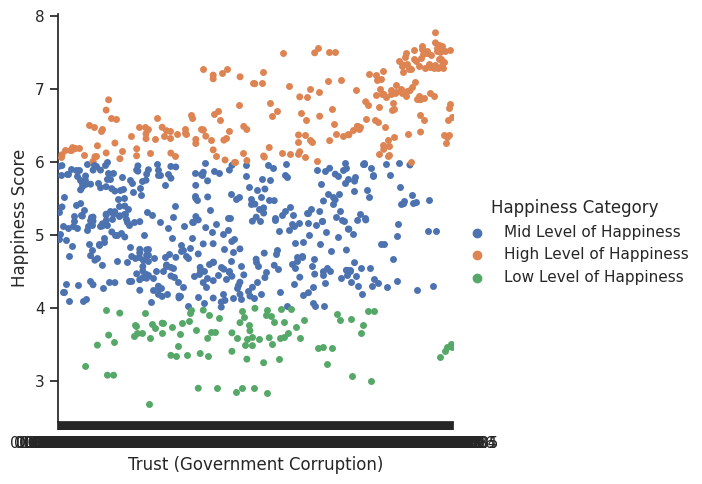

In [ ]:
#question 7 create and save categorical plot
sns.set(style="ticks")
g = sns.catplot(x="Trust (Government Corruption)", y="Happiness Score", hue="Happiness Category", data=df)
from google.colab import files
plt.savefig("Trust_Score_Category.png")
files.download("Trust_Score_Category.png")

Observation: High levels of happines are more concentrated with high levels of trust. Other than that there seems to be no correlation. I.e. you can be moderately happy or very unhappy and be across the spectrum with the levels of trust your government

#question 8 hypotheses
I hypothesize that in countries that have moved up in rankings, wealth and health are typically the indicators why. For the UPPER echolean of happiness ranks though, I think trust plays a factor.

